In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb

sns.set_theme(style="whitegrid")

In [3]:
pie_df = pd.read_csv ('Fire.csv')
pie_df


,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL SAVED,PERCENTAGE LOSS,SPRINKLER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng,TOTAL LOSS,Dist to 1st Station (mi),Dist to 2nd Station (mi)
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783,5000,1.01,1.23
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108,10000,0.97,1.26
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020,20000,1.88,2.06
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435,12000,0.28,1.43
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816,55000,0.46,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285,17500,0.71,1.65
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2237763.0,0.11,NaN,NaN,5307 GASTON AVE,32.803882,-96.765385,2500,0.78,0.97
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357630.0,0.00,YES,NaN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209,200,0.68,1.01
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056,600,2.67,5.37


In [43]:
pie_df["CAUSE"].value_counts

<bound method IndexOpsMixin.value_counts of 0              UNSPECIFIED SHORT CIRCUIT ARC
1                                      STORM
2      HEAT SOURCE TOO CLOSE TO COMBUSTIBLES
3      HEAT SOURCE TOO CLOSE TO COMBUSTIBLES
4              UNSPECIFIED SHORT CIRCUIT ARC
                       ...                  
616            UNSPECIFIED SHORT CIRCUIT ARC
617            UNSPECIFIED SHORT CIRCUIT ARC
618                     EQUIPMENT UNATTENDED
619    HEAT SOURCE TOO CLOSE TO COMBUSTIBLES
620                             UNDETERMINED
Name: CAUSE, Length: 621, dtype: object>

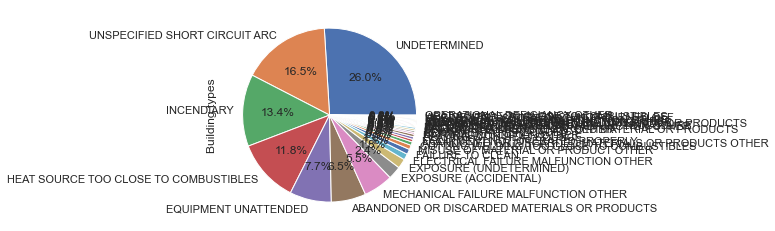

In [44]:
#pie_df.group[pie_df["CAUSE"].mean]

fire_type = pie_df['CAUSE'].value_counts()

fire_type.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.ylabel("Building types")
plt.show()

In [45]:
pie_df.loc[pie_df["CAUSE"] == "UNDETERMINED"]


pie_df.index

RangeIndex(start=0, stop=621, step=1)

In [46]:
#df = pie_df[pie_df["CAUSE"].str.contains ("UNSPECIFIED SHORT CIRCUIT ARC") ==True]
#df = pie_df[pie_df["CAUSE"].str.contains ("UNDETERMINED") ==True]

#df

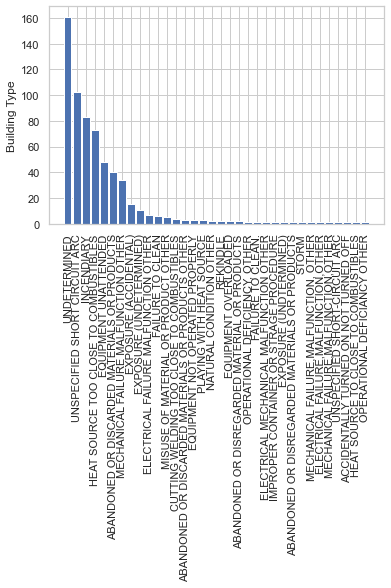

In [47]:


fire_type = pie_df['CAUSE'].value_counts()
plt.bar( fire_type.index.values,fire_type.values)
plt.ylabel("Building Type")
plt.xticks(rotation=90)
dir(fire_type)
plt.show()


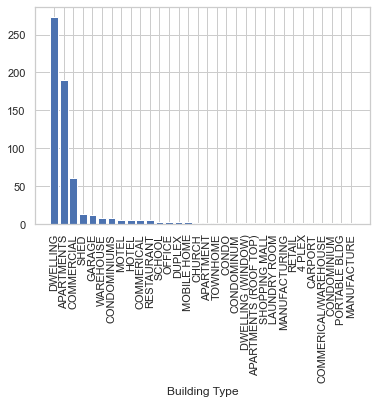

In [48]:
fire_type = pie_df['STRUCTURE TYPE'].value_counts()
p1 = plt.bar( fire_type.index.values,fire_type.values)
plt.xlabel("Building Type")
plt.xticks(rotation=90)



plt.show()


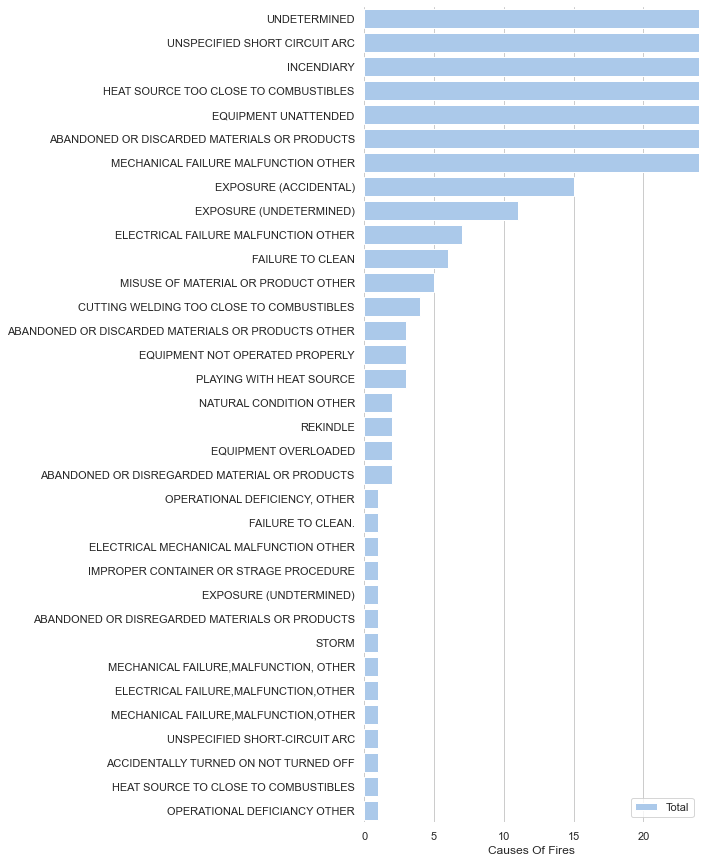

In [49]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#fire) = sns.fire_type("car_crashes").sort_values("total", ascending=False)
fire_type = pie_df['CAUSE'].value_counts()

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=fire_type.values, y=fire_type.index,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Causes Of Fires")
sns.despine(left=True, bottom=True)



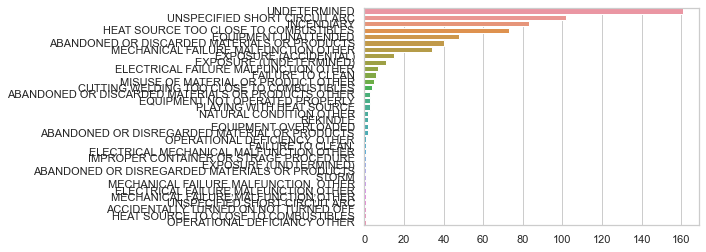

In [50]:
# plotting horizontal bar plots
sb.barplot(x =fire_type.values, y = fire_type.index)

# display
plt.show()

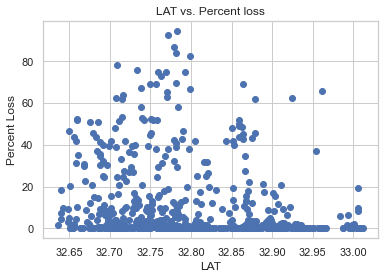

In [73]:
plt.scatter(pie_df["Lat"], pie_df["PERCENTAGE LOSS"]) 
plt.ylabel('Percent Loss')
plt.xlabel('LAT')
plt.title('LAT vs. Percent loss')
plt.show()

In [52]:
unique = pie_df["CAUSE"].unique()

unique 

array(['UNSPECIFIED SHORT CIRCUIT ARC', 'STORM',
       'HEAT SOURCE TOO CLOSE TO COMBUSTIBLES', 'UNDETERMINED',
       'EQUIPMENT UNATTENDED', 'ELECTRICAL FAILURE MALFUNCTION OTHER',
       'FAILURE TO CLEAN', 'INCENDIARY', 'EXPOSURE (ACCIDENTAL)',
       'CUTTING WELDING TOO CLOSE TO COMBUSTIBLES',
       'MECHANICAL FAILURE MALFUNCTION OTHER',
       'ABANDONED OR DISCARDED MATERIALS OR PRODUCTS',
       'ABANDONED OR DISREGARDED MATERIAL OR PRODUCTS',
       'FAILURE TO CLEAN.',
       'ABANDONED OR DISREGARDED MATERIALS OR PRODUCTS',
       'OPERATIONAL DEFICIENCY, OTHER', 'EXPOSURE (UNDETERMINED)',
       'PLAYING WITH HEAT SOURCE', 'HEAT SOURCE TO CLOSE TO COMBUSTIBLES',
       nan, 'ACCIDENTALLY TURNED ON NOT TURNED OFF', 'REKINDLE',
       'UNSPECIFIED SHORT-CIRCUIT ARC',
       'MECHANICAL FAILURE,MALFUNCTION,OTHER',
       'ELECTRICAL FAILURE,MALFUNCTION,OTHER',
       'MECHANICAL FAILURE,MALFUNCTION, OTHER',
       'EQUIPMENT NOT OPERATED PROPERLY',
       'ABANDONED OR DIS

In [72]:
avg_loss_cause = pie_df.groupby(["CAUSE"]).mean()["PERCENTAGE LOSS"]
#avg_loss_cause = pie_df.groupby(["CAUSE"]).median()["PERCENTAGE LOSS"]
avg_loss_cause = pie_df.groupby(["CAUSE"]).var()["PERCENTAGE LOSS"]
avg_loss_cause = pie_df.groupby(["CAUSE"]).var()["PERCENTAGE LOSS"]

print(avg_loss_cause)

CAUSE
ACCIDENTALLY TURNED ON NOT TURNED OFF               NaN
CUTTING WELDING TOO CLOSE TO COMBUSTIBLES      0.003425
DISCARDED MATERIALS                          171.211825
ELECTRICAL                                   191.989636
EQUIPMENT USED IMPROPERLY                    126.610041
EXPOSURE                                     398.814030
FAILURE TO CLEAN                               1.884390
HEAT SOURCE TOO CLOSE TO COMBUSTIBLES        357.429070
IMPROPER CONTAINER OR STRAGE PROCEDURE              NaN
INCENDIARY                                   363.910730
MECHANICAL FAILURE                           461.617834
MISUSE OF MATERIAL OR PRODUCT OTHER           50.304730
NATURAL CONDITION OTHER                      195.228800
OPERATIONAL DEFICIANCY                         0.151250
PLAYING WITH HEAT SOURCE                      44.876133
REKINDLE                                      12.500000
STORM                                               NaN
UNDETERMINED                              

In [56]:
pie_df = pie_df.replace(
    {"ABANDONED OR DISCARDED MATERIALS OR PRODUCTS": "DISCARDED MATERIALS",
     "ABANDONED OR DISCARDED MATERIALS OR PRODUCTS OTHER": "DISCARDED MATERIALS",     
     "ABANDONED OR DISREGARDED MATERIAL OR PRODUCTS": "DISCARDED MATERIALS",      #    1.344800
     "ABANDONED OR DISREGARDED MATERIALS OR PRODUCTS": "DISCARDED MATERIALS",
    
     "ELECTRICAL FAILURE MALFUNCTION OTHER":   "ELECTRICAL",                #176.490900
     "ELECTRICAL FAILURE,MALFUNCTION,OTHER":   "ELECTRICAL",                  # NaN
     "ELECTRICAL MECHANICAL MALFUNCTION OTHER": "ELECTRICAL",
     
     "EQUIPMENT NOT OPERATED PROPERLY": "EQUIPMENT USED IMPROPERLY",                   #   136.290900
     "EQUIPMENT OVERLOADED":            "EQUIPMENT USED IMPROPERLY",                    #   0.000800
     "EQUIPMENT UNATTENDED":            "EQUIPMENT USED IMPROPERLY",
     "IMPROPER CONTAINER OR STRAGE PROCEDURE": "EQUIPMENT USED IMPROPERLY",
     
     "EXPOSURE (ACCIDENTAL)":   "EXPOSURE",                               #  81.535892
     "EXPOSURE (UNDETERMINED)": "EXPOSURE",                        #  660.224820
     "EXPOSURE (UNDTERMINED)":  "EXPOSURE",
     
     "FAILURE TO CLEAN": "FAILURE TO CLEAN",                               #         0.171257
     "FAILURE TO CLEAN.": "FAILURE TO CLEAN",
     
     "HEAT SOURCE TO CLOSE TO COMBUSTIBLES": "HEAT SOURCE TOO CLOSE TO COMBUSTIBLES",                      #  NaN
     "HEAT SOURCE TOO CLOSE TO COMBUSTIBLES": "HEAT SOURCE TOO CLOSE TO COMBUSTIBLES", 
     
     "MECHANICAL FAILURE MALFUNCTION OTHER": "MECHANICAL FAILURE",                  #  486.703176
     "MECHANICAL FAILURE,MALFUNCTION, OTHER": "MECHANICAL FAILURE",                  #     NaN
     "MECHANICAL FAILURE,MALFUNCTION,OTHER": "MECHANICAL FAILURE",
     
     "OPERATIONAL DEFICIANCY OTHER": "OPERATIONAL DEFICIANCY",                             #  NaN
     "OPERATIONAL DEFICIENCY, OTHER": "OPERATIONAL DEFICIANCY",
     
     "UNSPECIFIED SHORT CIRCUIT ARC": "UNSPECIFIED SHORT CIRCUIT ARC",  #239.433510
     "UNSPECIFIED SHORT-CIRCUIT ARC": "UNSPECIFIED SHORT CIRCUIT ARC",
     
     
    
    })
pie_df

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


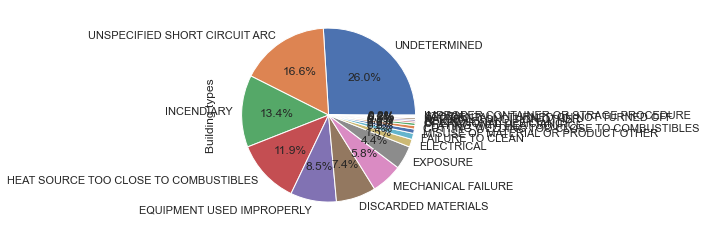

In [57]:
fire_pie = pie_df['CAUSE'].value_counts()

fire_pie.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.ylabel("Building types")
plt.show()

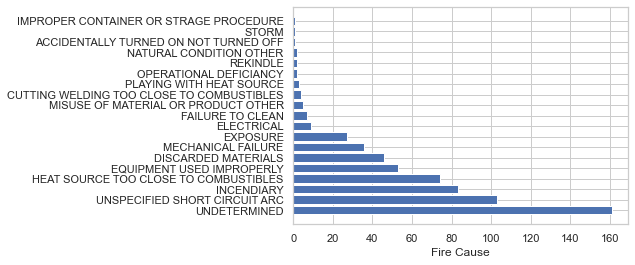

In [66]:
fire_type = pie_df['CAUSE'].value_counts()
p1 = plt.barh( fire_type.index.values,fire_type.values)
plt.xlabel("Fire Cause")
plt.xticks()



plt.show()

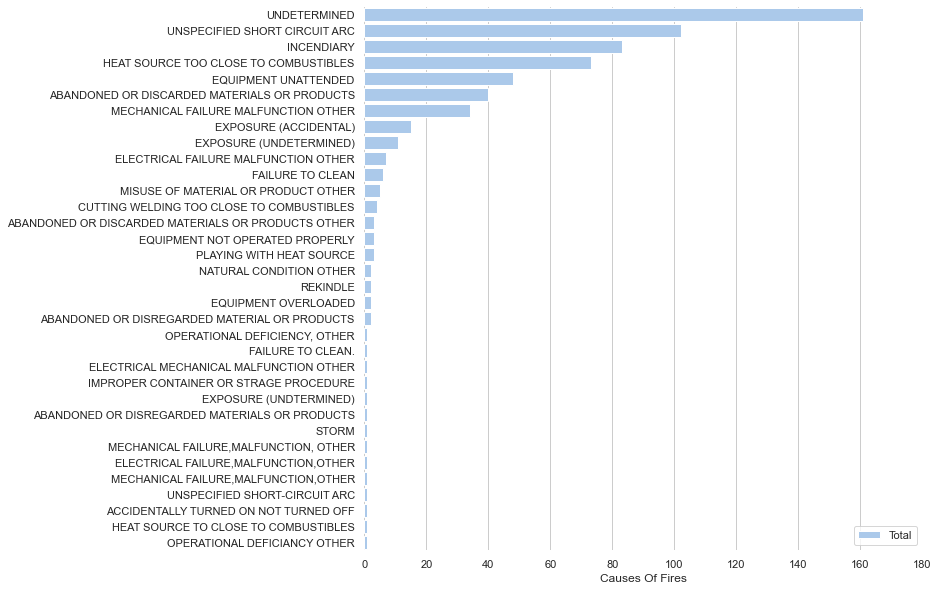

In [9]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Load the example car crash dataset
#fire) = sns.fire_type("car_crashes").sort_values("total", ascending=False)
fire_type = pie_df['CAUSE'].value_counts()

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=fire_type.values, y=fire_type.index,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,180), ylabel="",
       xlabel="Causes Of Fires")

sns.despine(left=True, bottom=True)